# **KHANIF FAUZI PAMBUDI (GRADED CHALLENGE 3 PHASE 1)**

Graded  Challenge  ini  dibuat  guna  mengevaluasi pembelajaran  pada  Hacktiv8  Data  Science  Fulltime Program khususnya pada konsep Ensemble. Dataset yang digunakan pada graded challenge ini dapat diakses melalui link berikut ini https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np

# **DATA LOADING**

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


# **DATA EXPLORATION**

In [ ]:
len(df)

299

In [ ]:
df.shape

(299, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
nmbr_cols = list(df.select_dtypes("number").columns)
nmbr_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [ ]:
df[nmbr_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
df[["DEATH_EVENT"]].describe().T

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,299.0,0.32107,0.46767,0.0,0.0,0.0,1.0,1.0


# **DATA CLEANING**

Mengecek apakah ada missing value pada dataset atau tidak

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing value

Mengecek apakah ada duplicate rows atau tidak

In [ ]:
df.duplicated().any()

False

# **EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

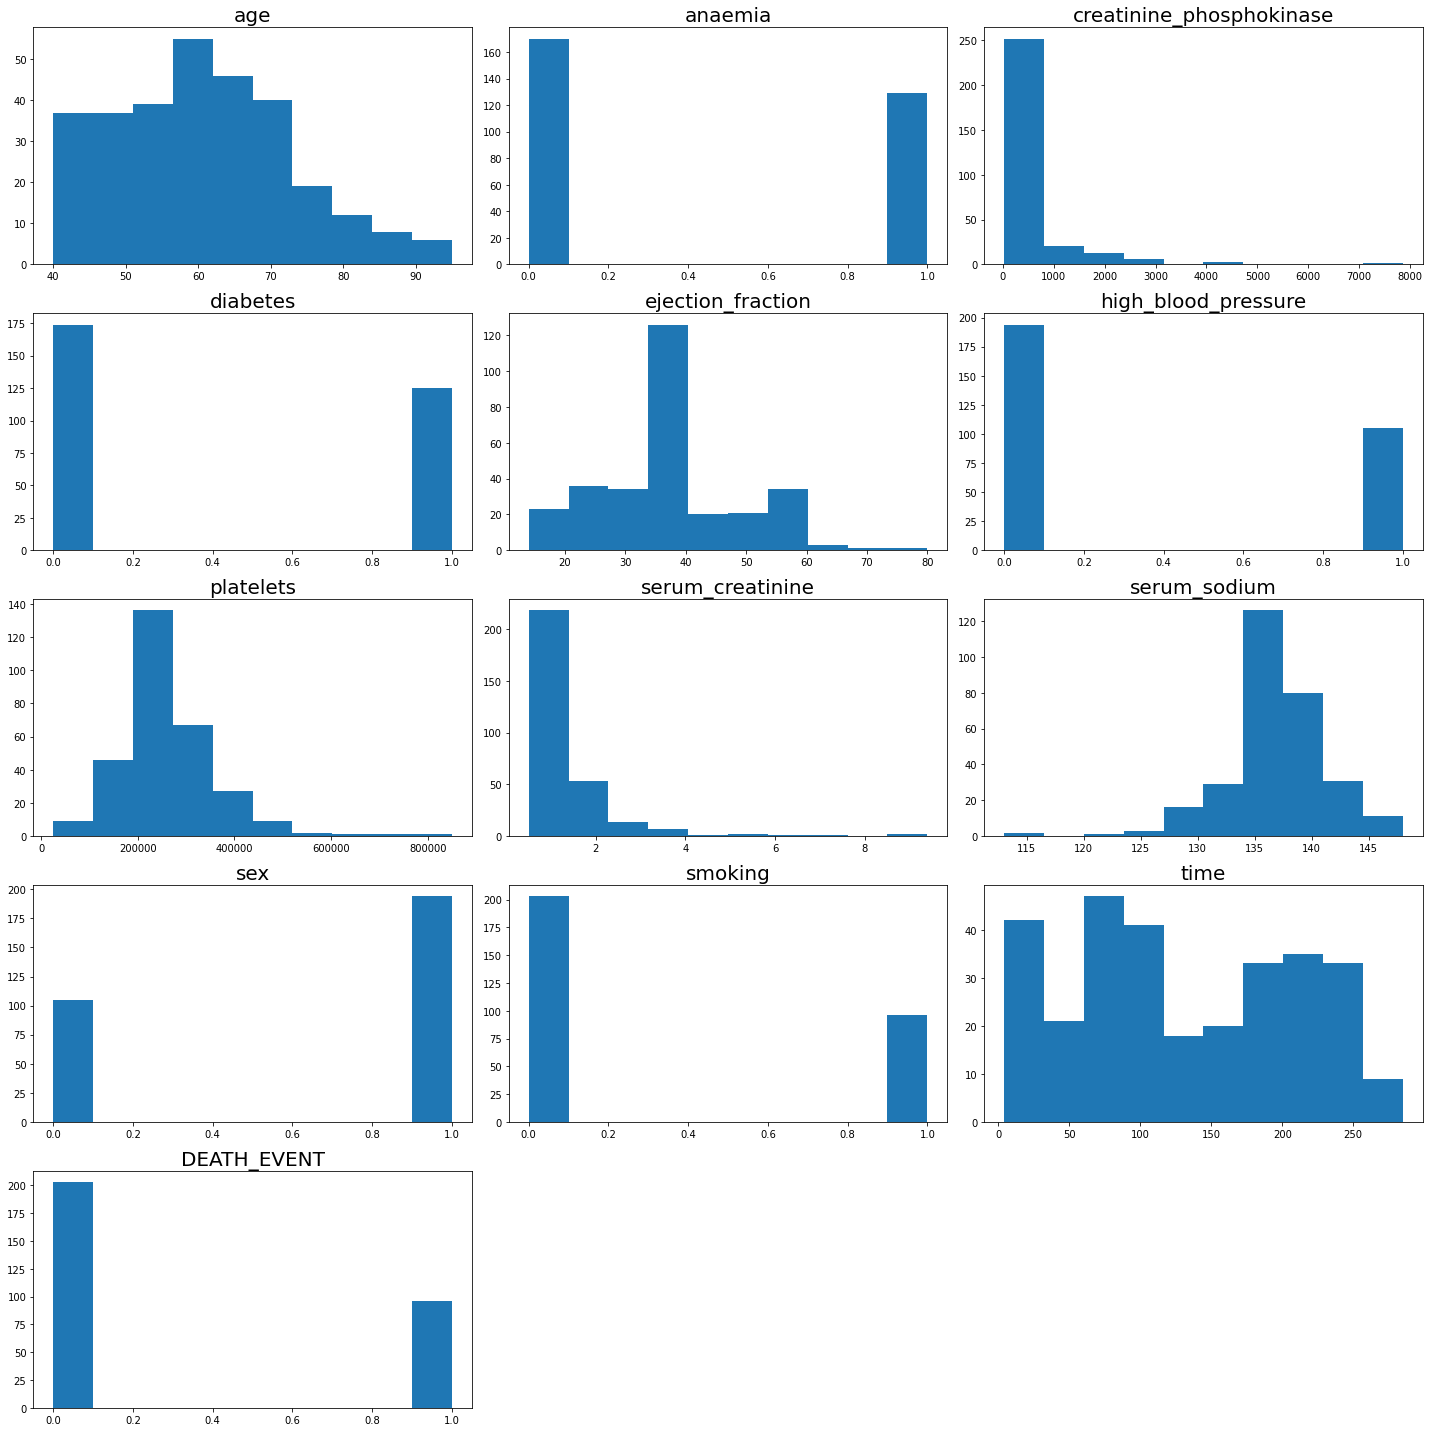

In [ ]:
#Melakukan plot untuk feature numerical
plt.figure(figsize = (20, 20))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    plt.hist(df[nmbr_cols[i]])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

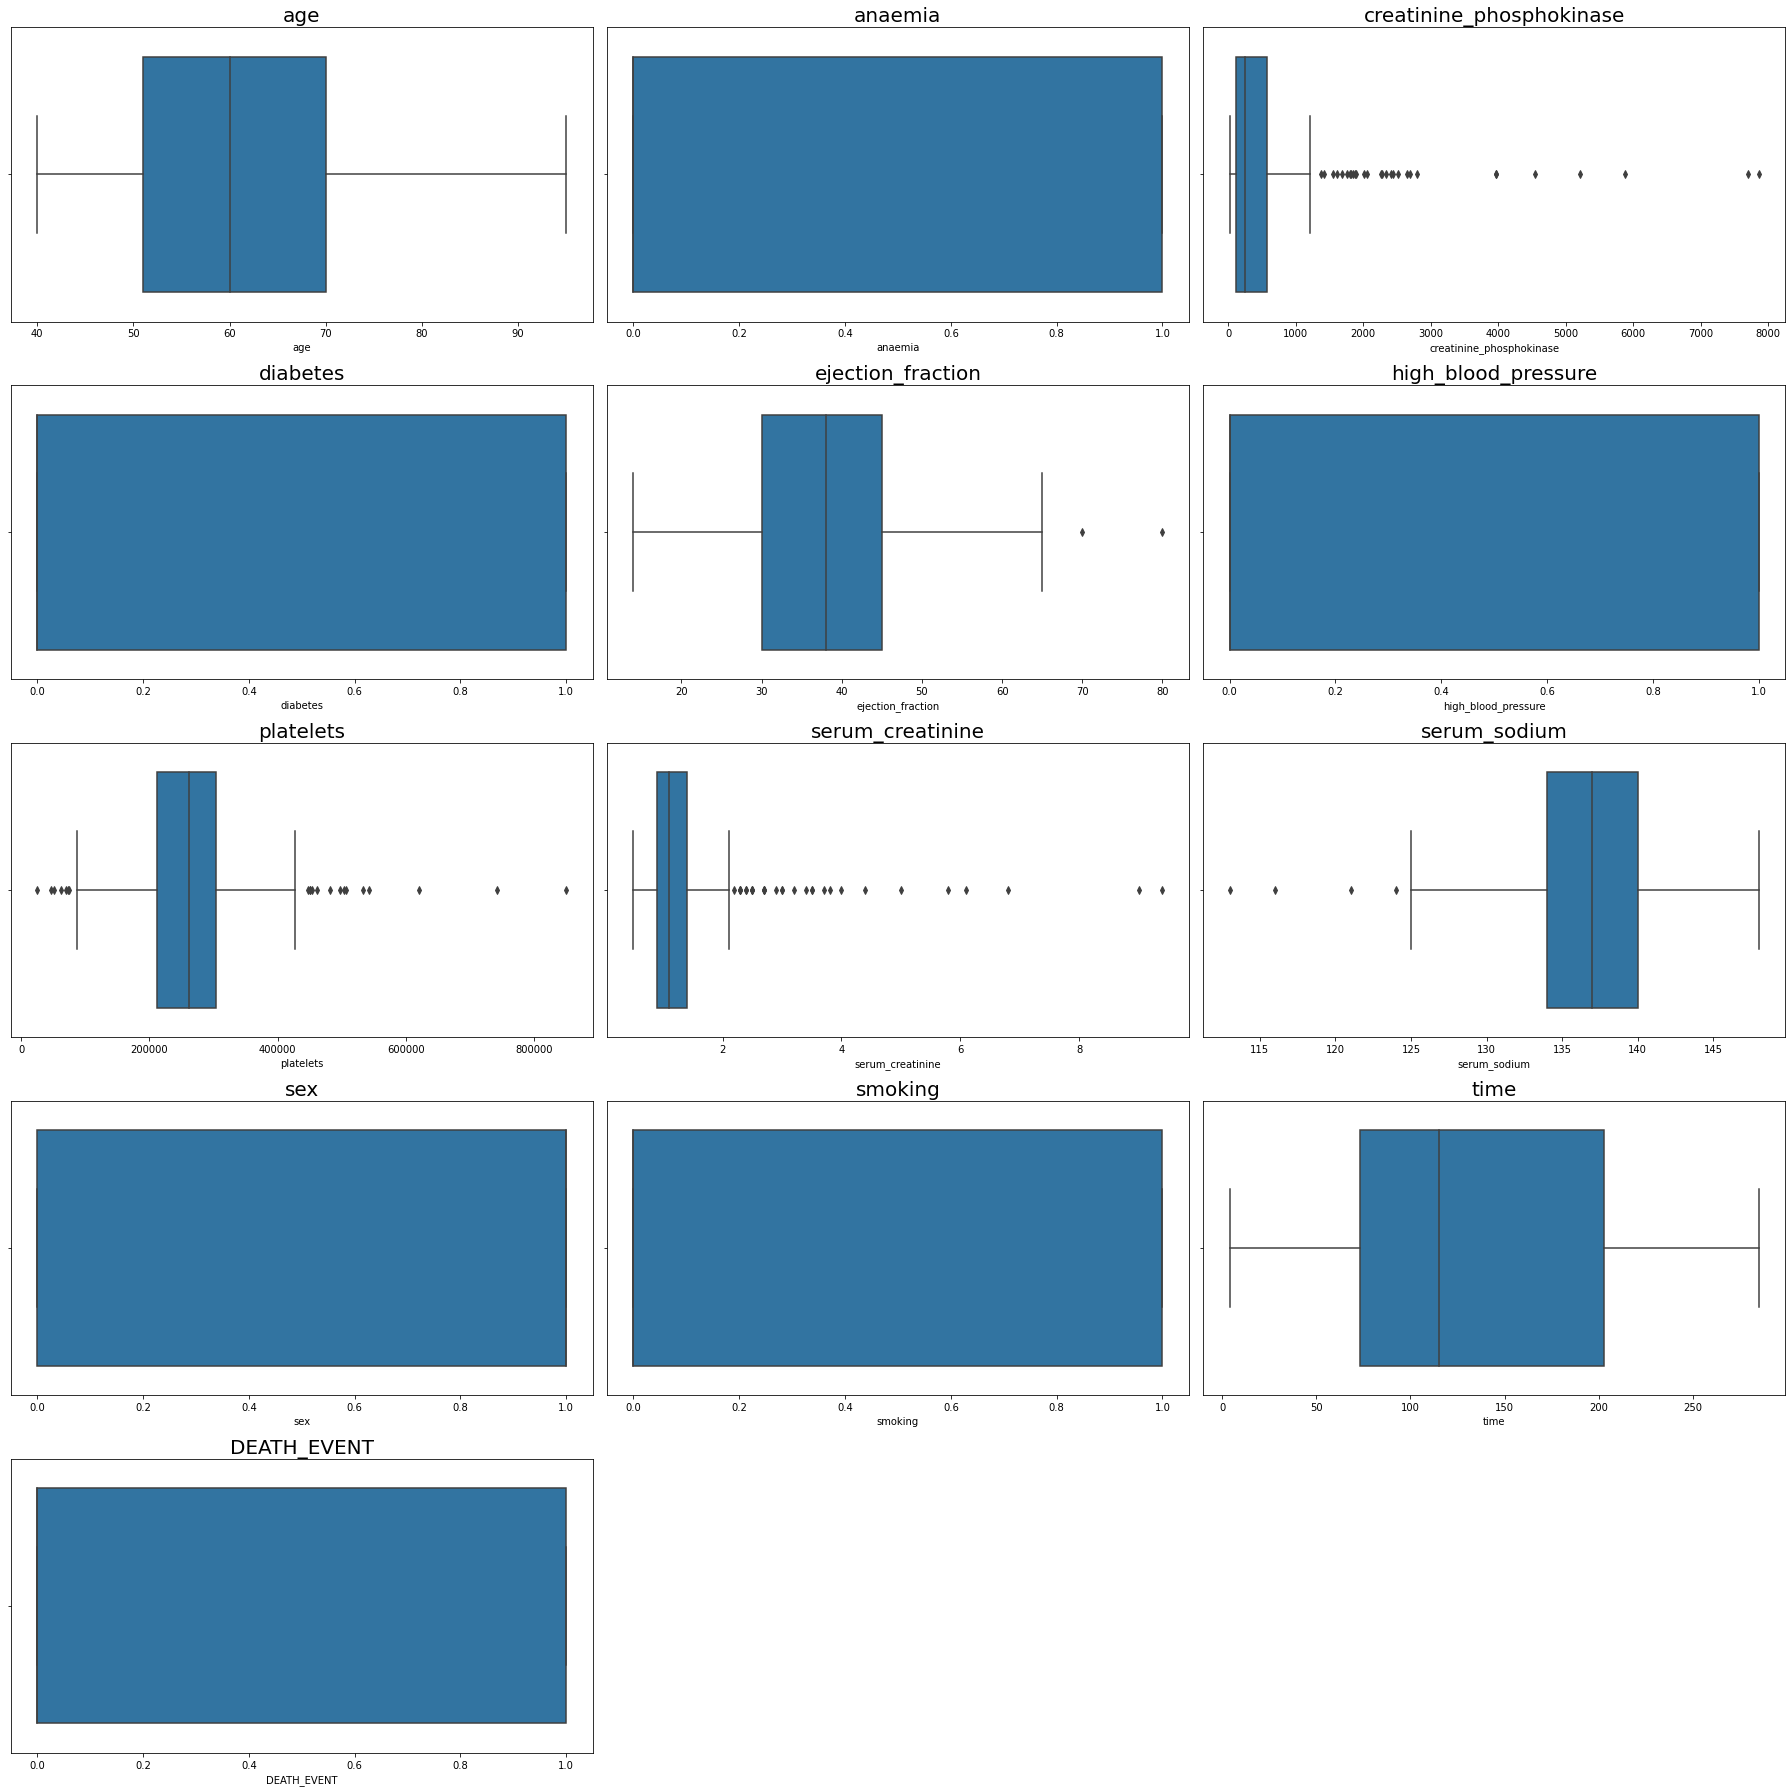

In [ ]:
# melakukan plot untuk feature numerical
plt.figure(figsize = (25, 25))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    sns.boxplot(x = df[nmbr_cols[i]])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

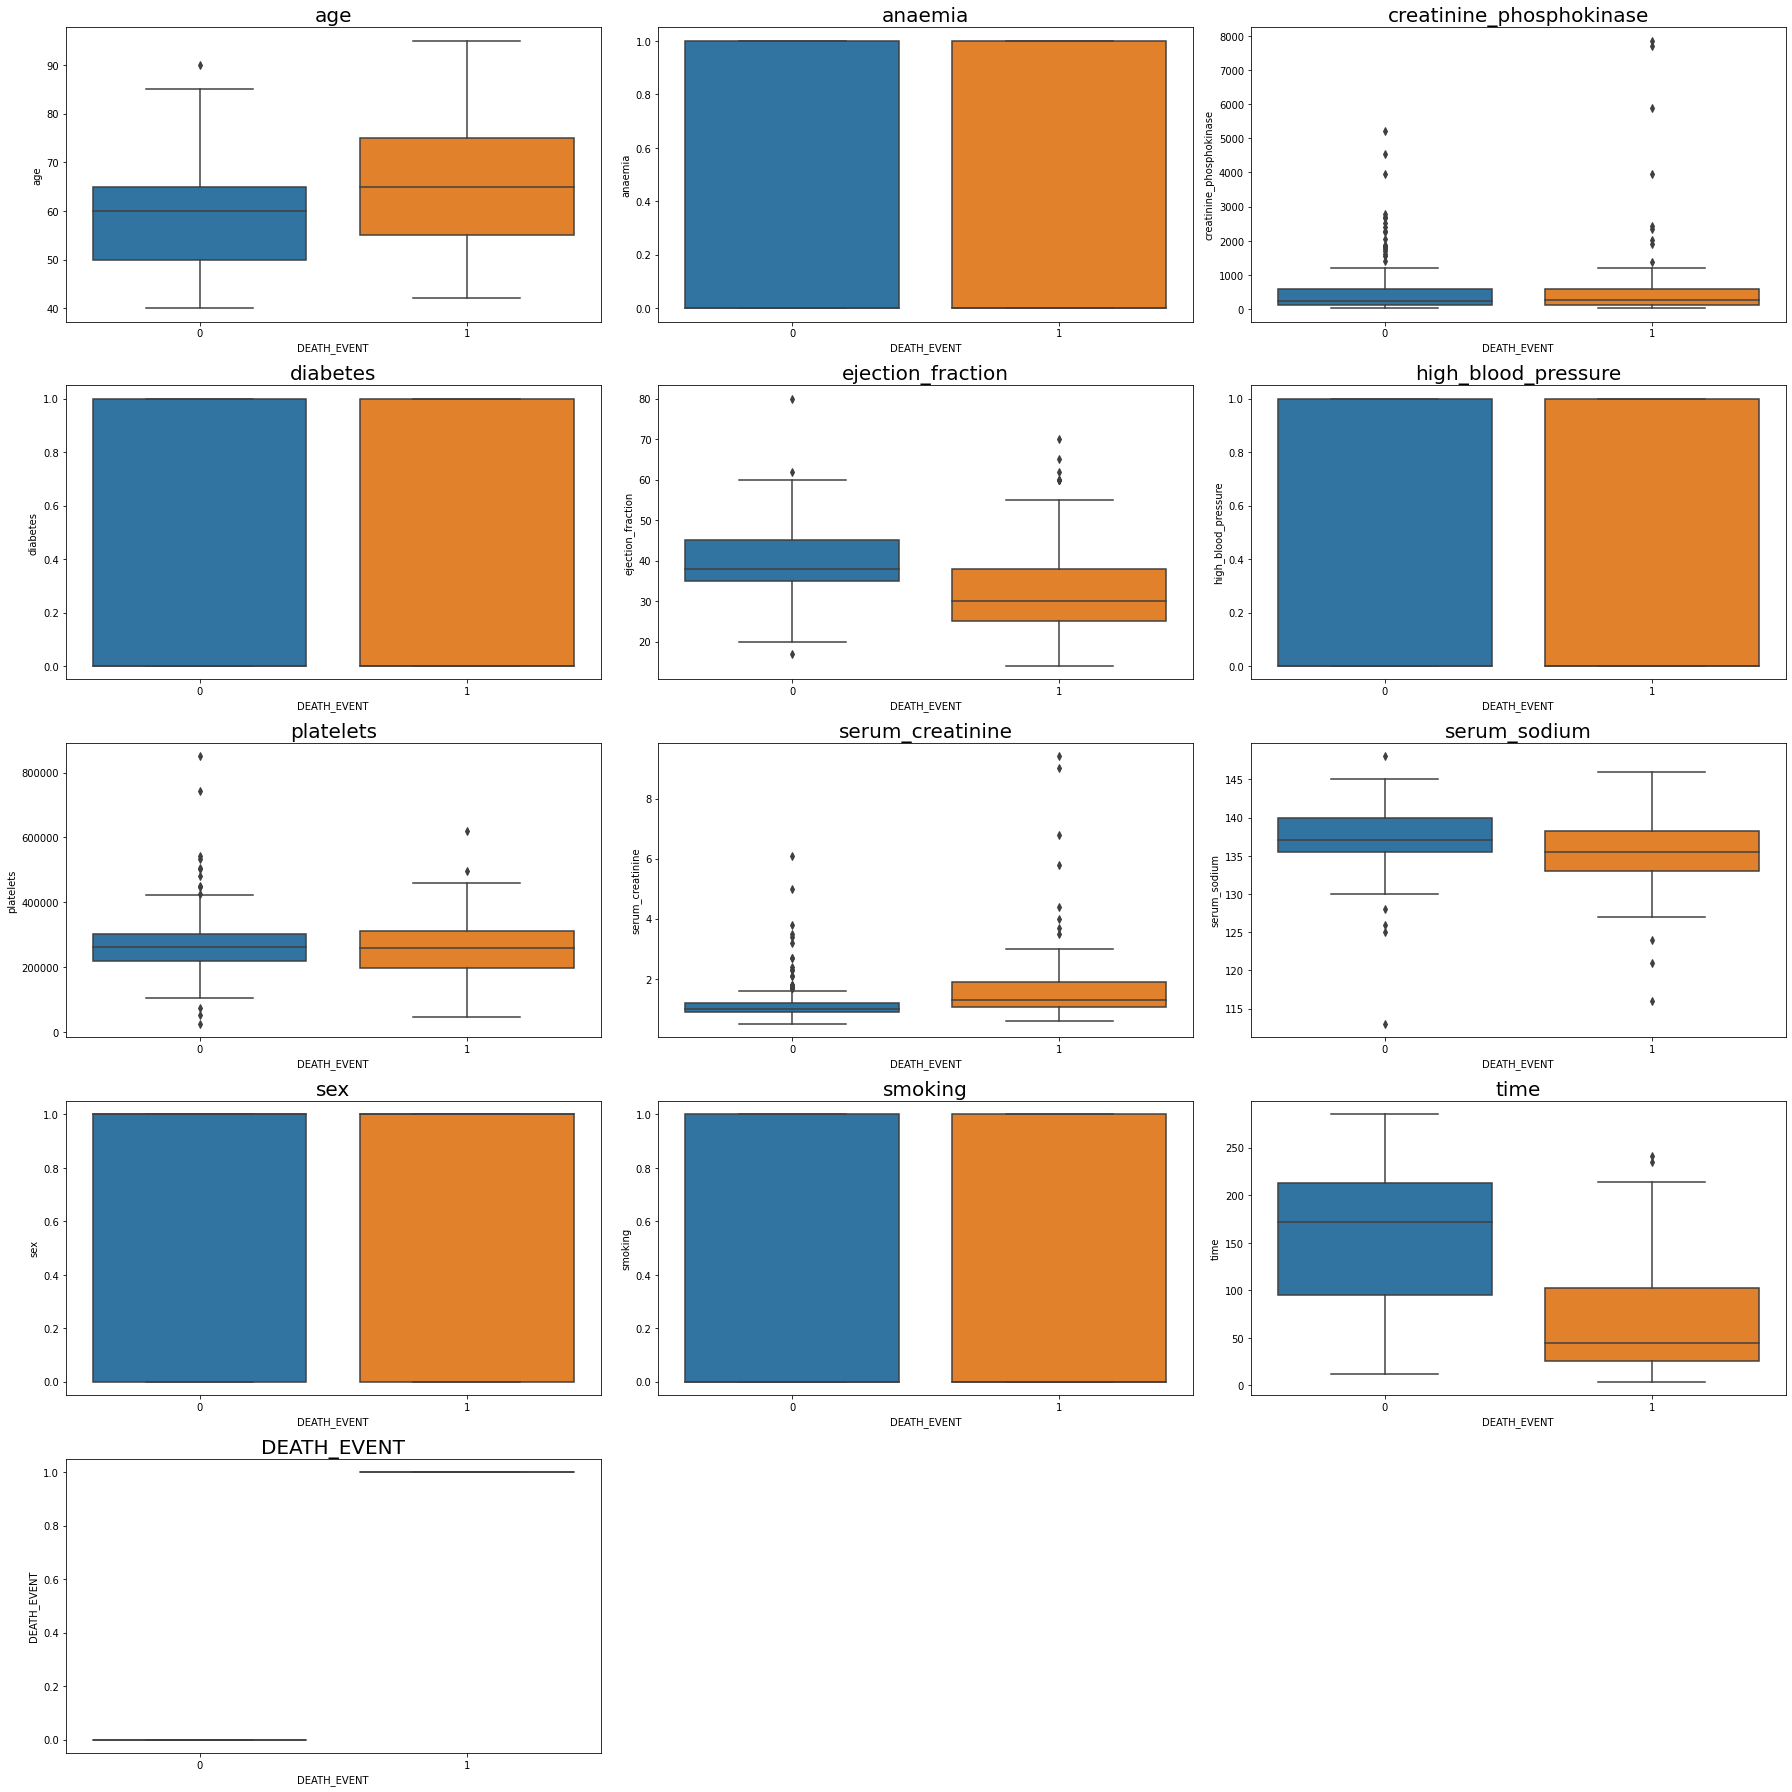

In [ ]:
# melakukan plot untuk feature numerical
plt.figure(figsize = (25, 25))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    sns.boxplot(y = df[nmbr_cols[i]], x = df['DEATH_EVENT'])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

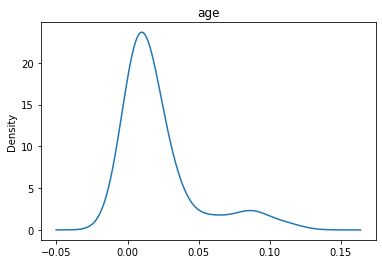

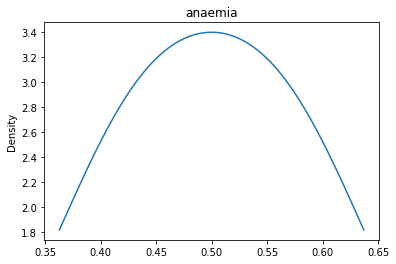

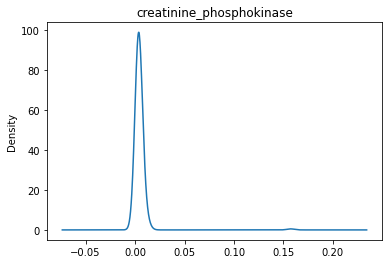

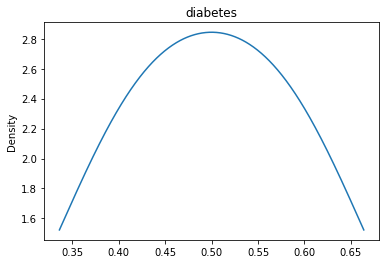

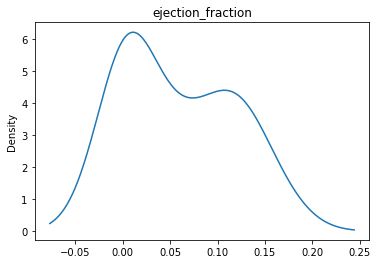

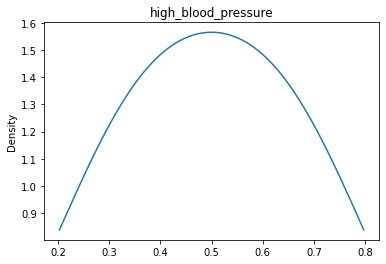

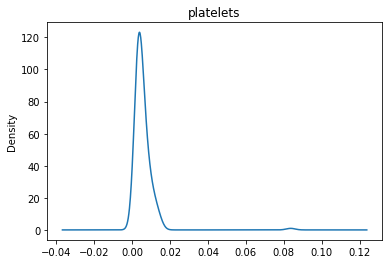

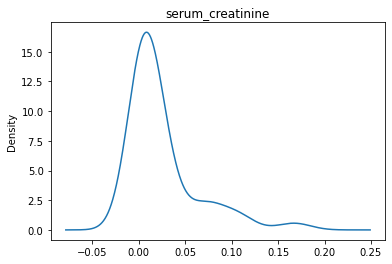

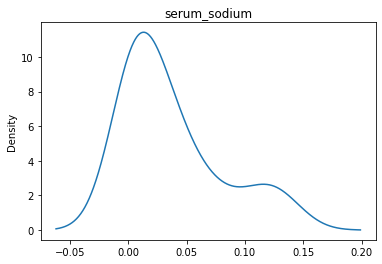

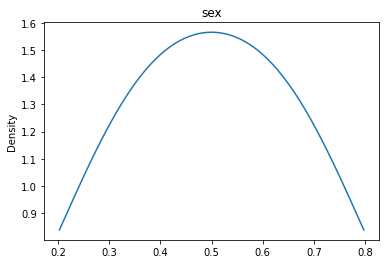

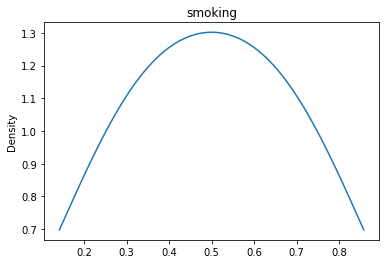

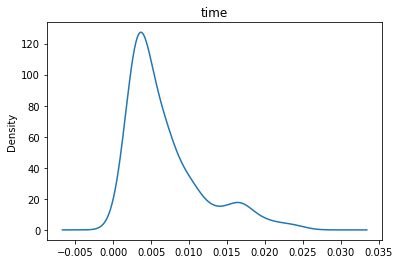

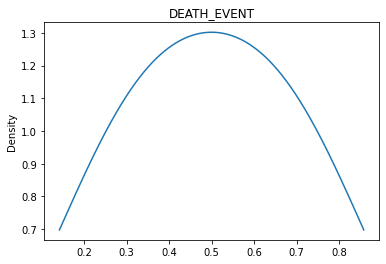

In [ ]:
for c in df.select_dtypes(include='number'):
  df[c].value_counts(normalize=True).plot.kde(title=c)
  plt.show()

# **TARGET DATA**

In [ ]:
df.groupby(["DEATH_EVENT"]).count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


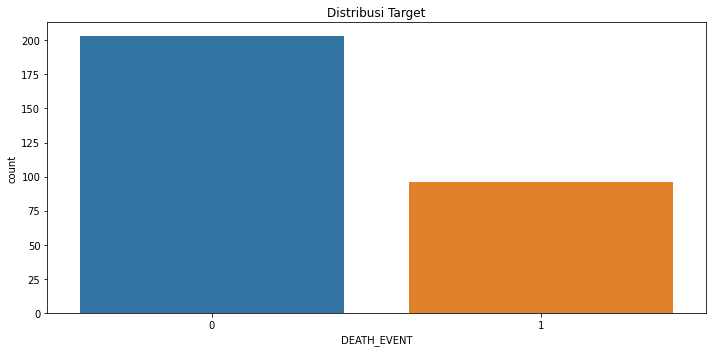

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["DEATH_EVENT"],
)
plt.title("Distribusi Target")
plt.tight_layout()
plt.show()

# **MATRIX CORRELATION**

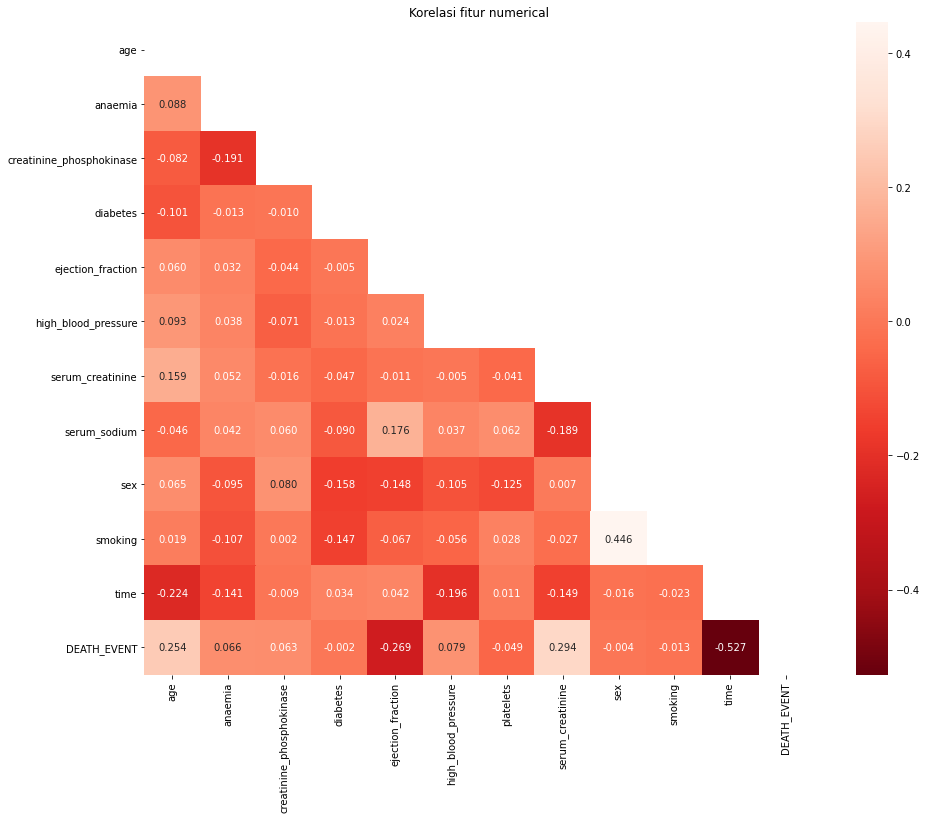

In [ ]:
corr_ = df[nmbr_cols].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(index=["platelets"], columns=["serum_sodium"])

plt.figure(figsize = (15, 12))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Reds_r'
)
plt.title("Korelasi fitur numerical")
plt.yticks(rotation=0)
plt.show()

# **RANDOM FOREST**

# **SETUP**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **SPLIT DATA**


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

In [ ]:
X_train.shape, X_test.shape

((239, 12), (60, 12))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_train = tree_clf.predict(X_train)
y_pred = tree_clf.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  

0.9

# **FEATURE IMPORTANCE**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [ ]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7824267782426778

In [ ]:
bag_clf.oob_decision_function_

array([[0.81538462, 0.18461538],
       [0.11351351, 0.88648649],
       [0.98941799, 0.01058201],
       [0.20108696, 0.79891304],
       [0.55080214, 0.44919786],
       [0.98802395, 0.01197605],
       [0.78947368, 0.21052632],
       [0.54314721, 0.45685279],
       [0.91397849, 0.08602151],
       [0.02857143, 0.97142857],
       [0.99456522, 0.00543478],
       [0.48258706, 0.51741294],
       [0.94949495, 0.05050505],
       [0.23163842, 0.76836158],
       [0.94021739, 0.05978261],
       [0.97727273, 0.02272727],
       [0.81914894, 0.18085106],
       [0.        , 1.        ],
       [0.89940828, 0.10059172],
       [0.92265193, 0.07734807],
       [1.        , 0.        ],
       [0.68472906, 0.31527094],
       [0.88172043, 0.11827957],
       [0.48704663, 0.51295337],
       [0.97109827, 0.02890173],
       [0.66492147, 0.33507853],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.27173913, 0.72826087],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

Saving figure mnist_feature_importance_plot


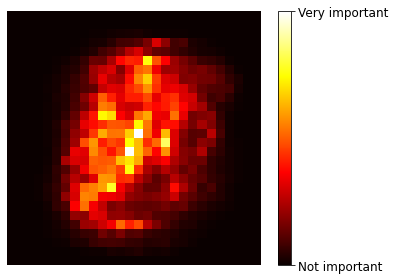

In [ ]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

# **BAGGING**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1000, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[162   0]
 [  0  77]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    162.0  77.0       1.0      239.0         239.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[37  4]
 [ 4 15]]
ACCURACY SCORE:
0.8667
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.902439   0.789474  0.866667   0.845956      0.866667
recall      0.902439   0.789474  0.866667   0.845956      0.866667
f1-score    0.902439   0.789474  0.866667   0.845956      0.866667
support    41.000000  19.000000  0.866667  60.000000     60.000000


In [ ]:
y_pred_bagging = bagging_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_bagging))

0.8666666666666667


In [ ]:
scores['Bagging Classifier']= {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
}

# **VOTING**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#soft voting
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
evaluate(voting_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[161   1]
 [ 18  59]]
ACCURACY SCORE:
0.9205
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.899441   0.983333  0.920502    0.941387      0.926469
recall       0.993827   0.766234  0.920502    0.880030      0.920502
f1-score     0.944282   0.861314  0.920502    0.902798      0.917551
support    162.000000  77.000000  0.920502  239.000000    239.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[40  1]
 [ 7 12]]
ACCURACY SCORE:
0.8667
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.851064   0.923077  0.866667   0.887070      0.873868
recall      0.975610   0.631579  0.866667   0.803594      0.866667
f1-score    0.909091   0.750000  0.866667   0.829545      0.858712
support    41.000000  19.000000  0.866667  60.000000     60.000000


In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.8
RandomForestClassifier 0.8833333333333333
SVC 0.6833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.8666666666666667


In [ ]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting_clf.predict(X_train)),
        'Test': accuracy_score(y_test, voting_clf.predict(X_test))
    }

# **MODEL RF**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[162   0]
 [  0  77]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    162.0  77.0       1.0      239.0         239.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[39  2]
 [ 5 14]]
ACCURACY SCORE:
0.8833
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.886364   0.875000  0.883333   0.880682      0.882765
recall      0.951220   0.736842  0.883333   0.844031      0.883333
f1-score    0.917647   0.800000  0.883333   0.858824      0.880392
support    41.000000  19.000000  0.883333  60.000000     60.000000


In [ ]:
scores = {
    'Random Forest': {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    },
}

In [ ]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
}

# **MODEL TUNNING RF (HYPERPARAMETER)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


Best paramters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False})
Train Result:
Accuracy Score: 97.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.974359   0.985294  0.977679    0.979827      0.977825
recall       0.993464   0.943662  0.977679    0.968563      0.977679
f1-score     0.983819   0.964029  0.977679    0.973924      0.977546
support    153.000000  71.000000  0.977679  224.000000    224.000000
_______________________________________________
Confusion Matrix: 
 [[152   1]
 [  4  67]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.953488   1.000000  0.966667   0.976744      0.968217
recall      1.000000   0.894737  0.966667   0.947368      0.966667

# **GRID SEARCH RF**

In [ ]:
n_estimators = [100, 300]
max_features = ['auto', 'sqrt']
max_depth = [3, 5]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.6min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
Accuracy Score: 98.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.980645   0.985507  0.982143    0.983076      0.982186
recall       0.993464   0.957746  0.982143    0.975605      0.982143
f1-score     0.987013   0.971429  0.982143    0.979221      0.982073
support    153.000000  71.000000  0.982143  224.000000    224.000000
_______________________________________________
Confusion Matrix: 
 [[152   1]
 [  3  68]]

Test Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.931818   1.000000      0.95   0.965909      0.953409
recall      1.000000   0.842105      0.95   0.921053      0.95000

# **EARLY STOPPING**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=72,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
evaluate(gbrt_best, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[149   4]
 [  6  65]]
ACCURACY SCORE:
0.9554
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.961290   0.942029  0.955357    0.951660      0.955185
recall       0.973856   0.915493  0.955357    0.944675      0.955357
f1-score     0.967532   0.928571  0.955357    0.948052      0.955183
support    153.000000  71.000000  0.955357  224.000000    224.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[41  0]
 [ 3 16]]
ACCURACY SCORE:
0.9500
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.931818   1.000000      0.95   0.965909      0.953409
recall      1.000000   0.842105      0.95   0.921053      0.950000
f1-score    0.964706   0.914286      0.95   0.939496      0.948739
support    41.000000  19.000000      0.95  60.000000     60.000000


# **BOOSTING**

# **ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
evaluate(ada_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[160   2]
 [  3  74]]
ACCURACY SCORE:
0.9791
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.981595   0.973684  0.979079    0.977640      0.979046
recall       0.987654   0.961039  0.979079    0.974347      0.979079
f1-score     0.984615   0.967320  0.979079    0.975968      0.979043
support    162.000000  77.000000  0.979079  239.000000    239.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[38  3]
 [ 6 13]]
ACCURACY SCORE:
0.8500
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.863636   0.812500      0.85   0.838068      0.847443
recall      0.926829   0.684211      0.85   0.805520      0.850000
f1-score    0.894118   0.742857      0.85   0.818487      0.846218
support    41.000000  19.000000      0.85  60.000000     60.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[162   0]
 [  0  77]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    162.0  77.0       1.0      239.0         239.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[39  2]
 [ 5 14]]
ACCURACY SCORE:
0.8833
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.886364   0.875000  0.883333   0.880682      0.882765
recall      0.951220   0.736842  0.883333   0.844031      0.883333
f1-score    0.917647   0.800000  0.883333   0.858824      0.880392
support    41.000000  19.000000  0.883333  60.000000     60.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_clf.predict(X_test)),
    }

# **GRADIENT BOOST**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[162   0]
 [  0  77]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    162.0  77.0       1.0      239.0         239.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[37  4]
 [ 6 13]]
ACCURACY SCORE:
0.8333
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.860465   0.764706  0.833333   0.812585      0.830141
recall      0.902439   0.684211  0.833333   0.793325      0.833333
f1-score    0.880952   0.722222  0.833333   0.801587      0.830688
support    41.000000  19.000000  0.833333  60.000000     60.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

# **XGBOOST**

In [ ]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) # Not shown
    print("Validation MSE:", val_error)           # Not shown

[14:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.10541581962393859


In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  # Not shown
    print("Validation MSE:", val_error)            # Not shown

[14:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.471363
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.445788
[2]	validation_0-rmse:0.423696
[3]	validation_0-rmse:0.406115
[4]	validation_0-rmse:0.390324
[5]	validation_0-rmse:0.376992
[6]	validation_0-rmse:0.366554
[7]	validation_0-rmse:0.3583
[8]	validation_0-rmse:0.34997
[9]	validation_0-rmse:0.341191
[10]	validation_0-rmse:0.337232
[11]	validation_0-rmse:0.331499
[12]	validation_0-rmse:0.328223
[13]	validation_0-rmse:0.322634
[14]	validation_0-rmse:0.320371
[15]	validation_0-rmse:0.316891
[16]	validation_0-rmse:0.315341
[17]	validation_0-rmse:0.316059
[18]	validation_0-rmse:0.316187
Stopping. Best iteration:
[16]	validation_0-rmse:0.315341

Validation MSE: 0.09943989998131687


In [ ]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
%timeit GradientBoostingClassifier().fit(X_train, y_train)

10 loops, best of 5: 91.8 ms per loop


In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1)

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    153.0  71.0       1.0      224.0         224.0
_______________________________________________
Confusion Matrix: 
 [[153   0]
 [  0  71]]



In [ ]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[153   0]
 [  0  71]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    153.0  71.0       1.0      224.0         224.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[41  0]
 [ 4 15]]
ACCURACY SCORE:
0.9333
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.911111   1.000000  0.933333   0.955556      0.939259
recall      1.000000   0.789474  0.933333   0.894737      0.933333
f1-score    0.953488   0.882353  0.933333   0.917921      0.930962
support    41.000000  19.000000  0.933333  60.000000     60.000000


In [ ]:
scores['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }

# **PERBANDINGAN MODEL RF DENGAN MODEL BOOSTING**

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

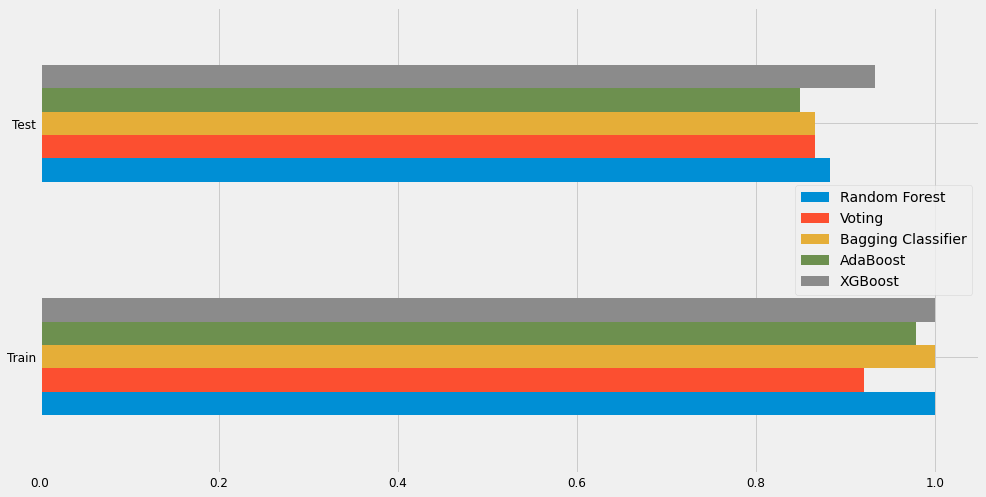

In [ ]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

# **MODEL ANALYSIS**



*   Pada model random forest hasil akurasi permodelan untuk training sebesar 100% namun hasil akurasi saat testing menurun 88.33%. Pada melakukan proses train dan test pada random forest ini ada indikasi overfitting
*   Saat melakukan model tunning dengan hyperparameter hasil akurasi permodelan untuk training sebesar 97.77% dan hasil akurasi testing sebesar 96.67% yang artinya data testing hasilnya tidak berbeda jauh dengan data training

*   Kemudian saat melakukan model grid search hasil akurasi permodelan untuk training sebesar 98.21% dan hasil akurasi testing sebesar 95.00%
*   Model random forest dapat dilakukan early stopping dimana kita ingin menghentikan proses training dan testing di kedalaman pohon tertentu dan jumlah pohon tertentu dengan hasil akurasi training sebesar 95.54% dan hasil akurasi testing 95.00%


*   Metode boosting pada random forest yang terbaik adalah model XGBOOST







# **OVERALL ANALYSIS**

Random forest merupakan model yang terbaik untuk melakukan klasifikasi pada dataset heart failure clinical records dengan overall akurasi sebesar 88.33% dibandingkan dengan logistic regression dengan akurasi 80% dan SVM 68.33%. Model tuning dengan hyperparameter, grid search, dan boosting mempengaruhi akurasi model random forest dengan hasil akurasi terbaik dihasilkan pada grid search random forest.